# GelMA only

In [1]:
import pandas as pd

In [2]:
from sklearn import preprocessing

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp
from scipy.stats import sem
import statistics

## Parameters and Data Import

In [4]:
pi = 3.141592653589793238

In [9]:
GelMA1 = pd.read_csv("GelMA1.csv")
GelMA1_H = 3.12
GelMA1_D = 14.02/1000
GelMA1_R = GelMA1_D/2

GelMA2 = pd.read_csv("GelMA2.csv")
GelMA2_H = 3.40
GelMA2_D = 14.79/1000
GelMA2_R = GelMA2_D/2

GelMA3 = pd.read_csv("GelMA3.csv")
GelMA3_H = 4.10
GelMA3_D = 14.47/1000
GelMA3_R = GelMA3_D/2

GelMA4 = pd.read_csv("GelMA4.csv")
GelMA4_H = 3.84
GelMA4_D = 15.80/1000
GelMA4_R = GelMA4_D/2

GelMA5 = pd.read_csv("GelMA5.csv")
GelMA5_H = 3.99
GelMA5_D = 13.65/1000
GelMA5_R = GelMA5_D/2


In [10]:
GelMA1.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

GelMA2.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

GelMA3.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

GelMA4.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

GelMA5.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

In [11]:
GelMA1

,Time [sec],Force [N],Stroke [mm]
0,0.00,-0.014941,0.000000
1,0.01,-0.013908,0.000000
2,0.02,-0.013192,0.000033
3,0.03,-0.013510,0.000033
4,0.04,-0.013908,0.000100
...,...,...,...
18061,180.61,105.707500,3.010067
18062,180.62,105.654600,3.010233
18063,180.63,105.602700,3.010400
18064,180.64,105.539600,3.010533


## Stress and Strain Calculation

In [12]:
pi*GelMA1_R**2

0.00015437817715666777

In [14]:
GelMA1['Engineering Strain'] = GelMA1['Stroke [mm]']/ GelMA1_H 
GelMA1['Stress [Pa]'] = (GelMA1['Force [N]'])/(pi*(GelMA1_R**2))

GelMA2['Engineering Strain'] = GelMA2['Stroke [mm]']/ GelMA2_H 
GelMA2['Stress [Pa]'] = (GelMA2['Force [N]']/(pi*GelMA2_R**2))

GelMA3['Engineering Strain'] = GelMA3['Stroke [mm]']/ GelMA3_H 
GelMA3['Stress [Pa]'] = (GelMA3['Force [N]']/(pi*GelMA3_R**2))

GelMA4['Engineering Strain'] = GelMA4['Stroke [mm]']/ GelMA4_H 
GelMA4['Stress [Pa]'] = (GelMA4['Force [N]']/(pi*GelMA4_R**2))

GelMA5['Engineering Strain'] = GelMA5['Stroke [mm]']/ GelMA5_H 
GelMA5['Stress [Pa]'] = (GelMA5['Force [N]']/(pi*GelMA5_R**2))



GelMA1['Engineering Strain'] = GelMA1['Stroke [mm]']/ GelMA1_H 
GelMA1['Stress [kPa]'] = ((GelMA1['Force [N]'])/(pi*(GelMA1_R**2)))/1000

GelMA2['Engineering Strain'] = GelMA2['Stroke [mm]']/ GelMA2_H 
GelMA2['Stress [kPa]'] = ((GelMA2['Force [N]']/(pi*GelMA2_R**2)))/1000

GelMA3['Engineering Strain'] = GelMA3['Stroke [mm]']/ GelMA3_H 
GelMA3['Stress [kPa]'] = ((GelMA3['Force [N]']/(pi*GelMA3_R**2)))/1000

GelMA4['Engineering Strain'] = GelMA4['Stroke [mm]']/ GelMA4_H 
GelMA4['Stress [kPa]'] = ((GelMA4['Force [N]']/(pi*GelMA4_R**2)))/1000

GelMA5['Engineering Strain'] = GelMA5['Stroke [mm]']/ GelMA5_H 
GelMA5['Stress [kPa]'] = ((GelMA5['Force [N]']/(pi*GelMA5_R**2)))/1000

In [15]:
GelMA1['Stress [Pa]']

0           -96.781166
1           -90.088834
2           -85.455666
3           -87.514895
4           -90.088834
             ...      
18061    684730.846982
18062    684388.181969
18063    684051.994556
18064    683643.258029
18065    683041.489038
Name: Stress [Pa], Length: 18066, dtype: float64

## Cutting the Data 

In [16]:
GelMA1_cut = GelMA1[~(GelMA1['Force [N]']<= 0.1)]

GelMA2_cut = GelMA2[~(GelMA2['Force [N]']<= 0.1)]

GelMA3_cut = GelMA3[~(GelMA3['Force [N]']<= 0.1)]

GelMA4_cut = GelMA4[~(GelMA4['Force [N]']<= 0.1)]

GelMA5_cut = GelMA5[~(GelMA5['Force [N]']<= 0.1)]

In [17]:
GelMA1_cut

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa]
3576,35.76,0.100533,0.595900,0.190994,651.213804,0.651214
3588,35.88,0.100533,0.597867,0.191624,651.213804,0.651214
3593,35.93,0.100136,0.598800,0.191923,648.639606,0.648640
3594,35.94,0.100692,0.598967,0.191977,652.243095,0.652243
3595,35.95,0.101089,0.599100,0.192019,654.817293,0.654817
...,...,...,...,...,...,...
18061,180.61,105.707500,3.010067,0.964765,684730.846982,684.730847
18062,180.62,105.654600,3.010233,0.964818,684388.181969,684.388182
18063,180.63,105.602700,3.010400,0.964872,684051.994556,684.051995
18064,180.64,105.539600,3.010533,0.964914,683643.258029,683.643258


In [18]:
GelMA1_cut['Strain Normalised'] = GelMA1_cut['Engineering Strain'] - GelMA1_cut.iloc[0]['Engineering Strain']

GelMA2_cut['Strain Normalised'] = GelMA2_cut['Engineering Strain'] - GelMA2_cut.iloc[0]['Engineering Strain']

GelMA3_cut['Strain Normalised'] = GelMA3_cut['Engineering Strain'] - GelMA3_cut.iloc[0]['Engineering Strain']

GelMA4_cut['Strain Normalised'] = GelMA4_cut['Engineering Strain'] - GelMA4_cut.iloc[0]['Engineering Strain']

GelMA5_cut['Strain Normalised'] = GelMA5_cut['Engineering Strain'] - GelMA5_cut.iloc[0]['Engineering Strain']

GelMA1_cut

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_4192/1161995326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA1_cut['Strain Normalised'] = GelMA1_cut['Engineering Strain'] - GelMA1_cut.iloc[0]['Engineering Strain']
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_4192/1161995326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA2_cut['Strain Normalised'] = GelMA2_cut['Engineering Strain'] - GelMA2_cut.iloc[0]['Engineering Strain']
/var/folders/97/y1n8_jns6rl_dk0yr67c2w

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised
3576,35.76,0.100533,0.595900,0.190994,651.213804,0.651214,0.000000
3588,35.88,0.100533,0.597867,0.191624,651.213804,0.651214,0.000630
3593,35.93,0.100136,0.598800,0.191923,648.639606,0.648640,0.000929
3594,35.94,0.100692,0.598967,0.191977,652.243095,0.652243,0.000983
3595,35.95,0.101089,0.599100,0.192019,654.817293,0.654817,0.001026
...,...,...,...,...,...,...,...
18061,180.61,105.707500,3.010067,0.964765,684730.846982,684.730847,0.773771
18062,180.62,105.654600,3.010233,0.964818,684388.181969,684.388182,0.773825
18063,180.63,105.602700,3.010400,0.964872,684051.994556,684.051995,0.773878
18064,180.64,105.539600,3.010533,0.964914,683643.258029,683.643258,0.773921


In [19]:
GelMA1_cut['Stroke Normalised'] = GelMA1_cut['Stroke [mm]'] - GelMA1_cut.iloc[0]['Stroke [mm]']

GelMA2_cut['Stroke Normalised'] = GelMA2_cut['Stroke [mm]'] - GelMA2_cut.iloc[0]['Stroke [mm]']

GelMA3_cut['Stroke Normalised'] = GelMA3_cut['Stroke [mm]'] - GelMA3_cut.iloc[0]['Stroke [mm]']

GelMA4_cut['Stroke Normalised'] = GelMA4_cut['Stroke [mm]'] - GelMA4_cut.iloc[0]['Stroke [mm]']

GelMA5_cut['Stroke Normalised'] = GelMA5_cut['Stroke [mm]'] - GelMA5_cut.iloc[0]['Stroke [mm]']


GelMA1_cut

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_4192/2639234990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA1_cut['Stroke Normalised'] = GelMA1_cut['Stroke [mm]'] - GelMA1_cut.iloc[0]['Stroke [mm]']
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_4192/2639234990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA2_cut['Stroke Normalised'] = GelMA2_cut['Stroke [mm]'] - GelMA2_cut.iloc[0]['Stroke [mm]']
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_4192/26

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised
3576,35.76,0.100533,0.595900,0.190994,651.213804,0.651214,0.000000,0.000000
3588,35.88,0.100533,0.597867,0.191624,651.213804,0.651214,0.000630,0.001967
3593,35.93,0.100136,0.598800,0.191923,648.639606,0.648640,0.000929,0.002900
3594,35.94,0.100692,0.598967,0.191977,652.243095,0.652243,0.000983,0.003067
3595,35.95,0.101089,0.599100,0.192019,654.817293,0.654817,0.001026,0.003200
...,...,...,...,...,...,...,...,...
18061,180.61,105.707500,3.010067,0.964765,684730.846982,684.730847,0.773771,2.414167
18062,180.62,105.654600,3.010233,0.964818,684388.181969,684.388182,0.773825,2.414333
18063,180.63,105.602700,3.010400,0.964872,684051.994556,684.051995,0.773878,2.414500
18064,180.64,105.539600,3.010533,0.964914,683643.258029,683.643258,0.773921,2.414633


### Plotting Force and Stroke Normalised 

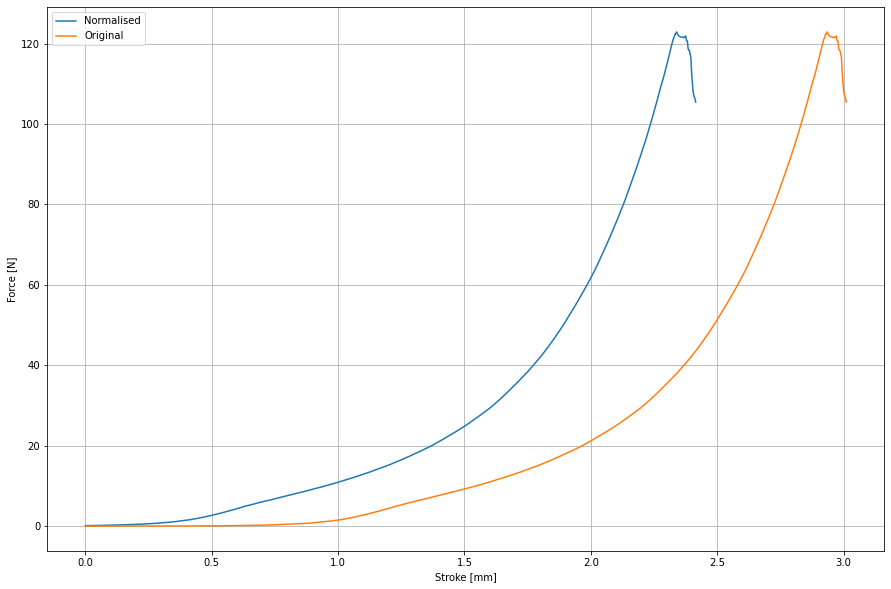

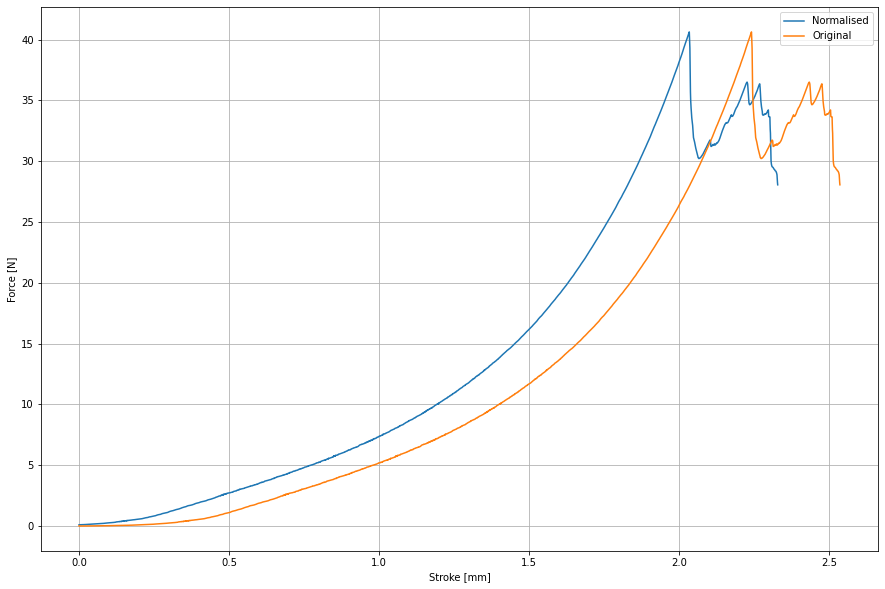

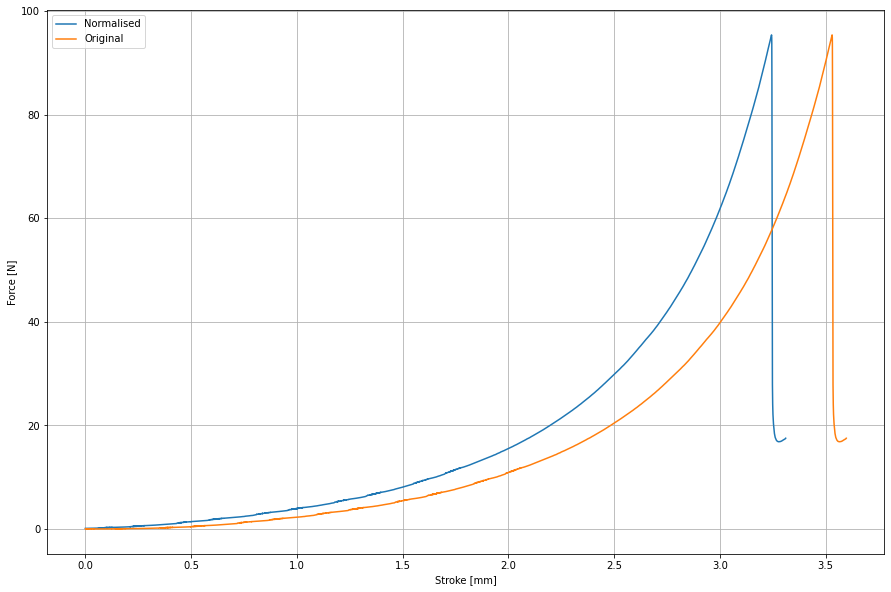

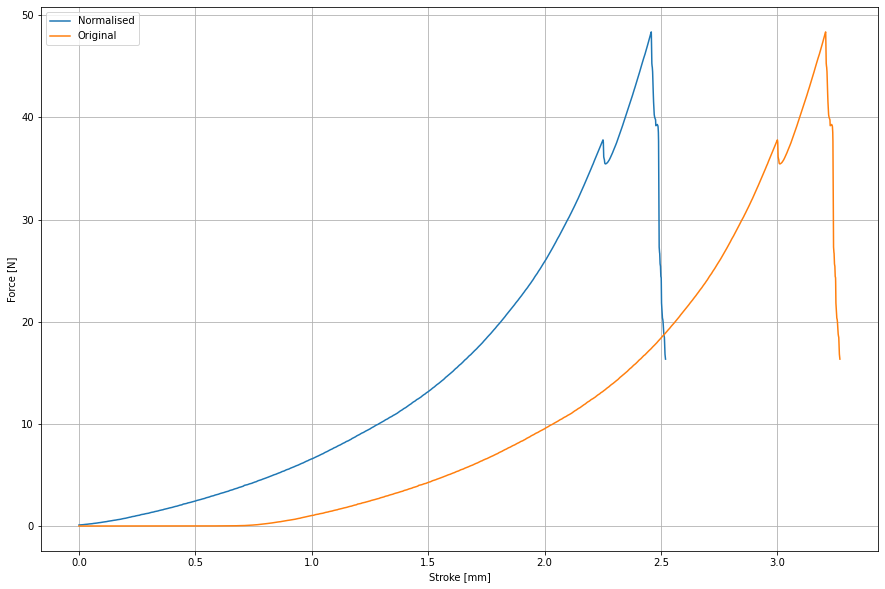

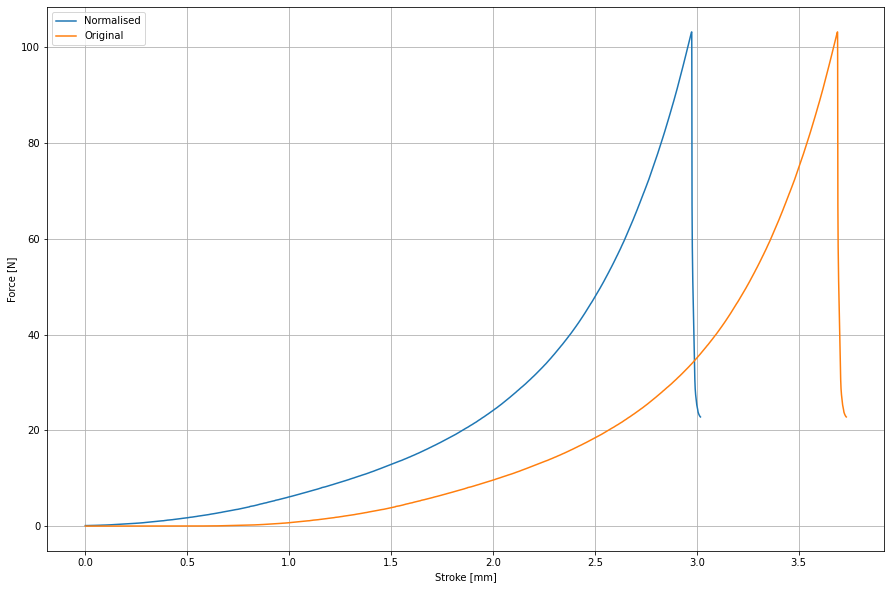

In [20]:
axA = GelMA1_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA1.plot(ax = axA, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
plt.show()


axB = GelMA2_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA2.plot(ax = axB, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
plt.show()

axC = GelMA3_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA3.plot(ax = axC, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
plt.show()

axD = GelMA4_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA4.plot(ax = axD, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
plt.show()

axE = GelMA5_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA5.plot(ax = axE, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
#plt.savefig("GelMA only_FS_Dry.png")
plt.show()


### Plotting Stress and Strain Normalised 

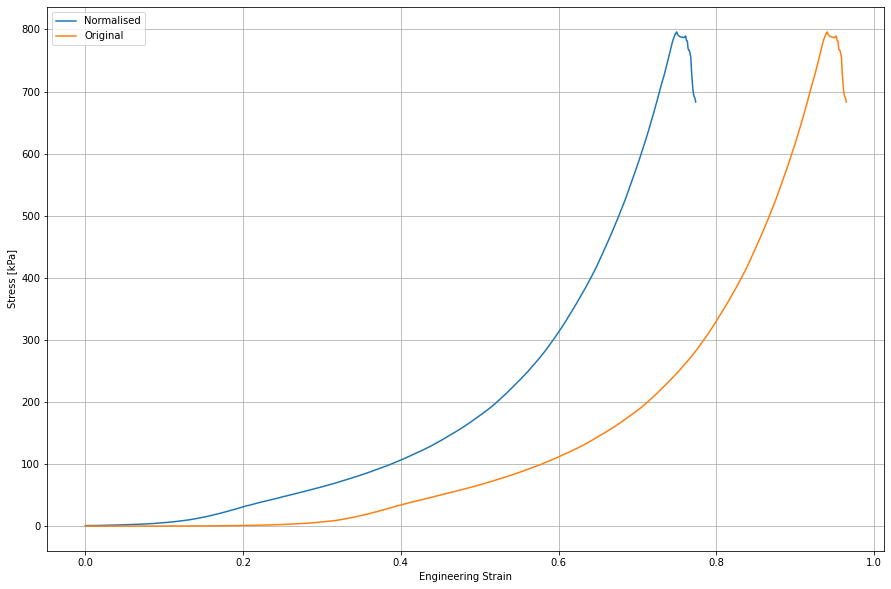

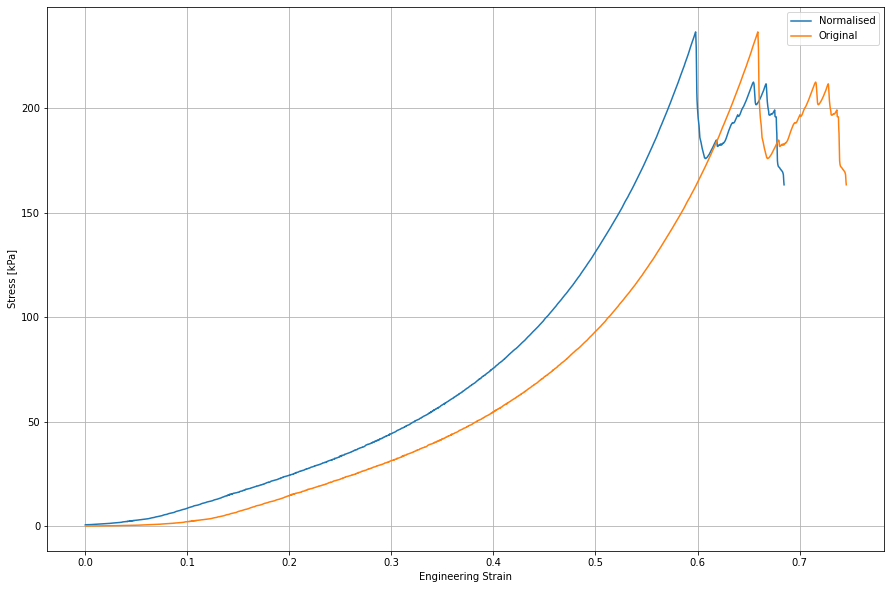

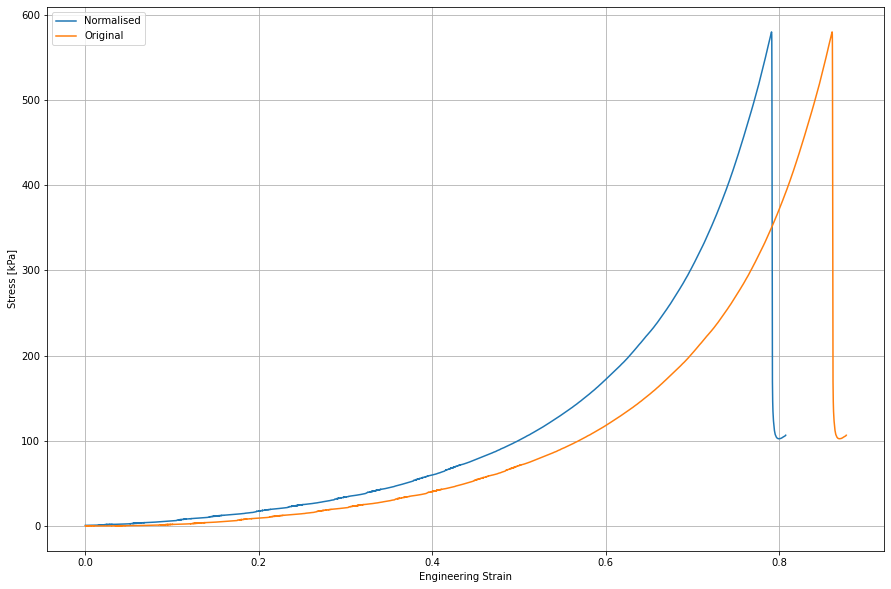

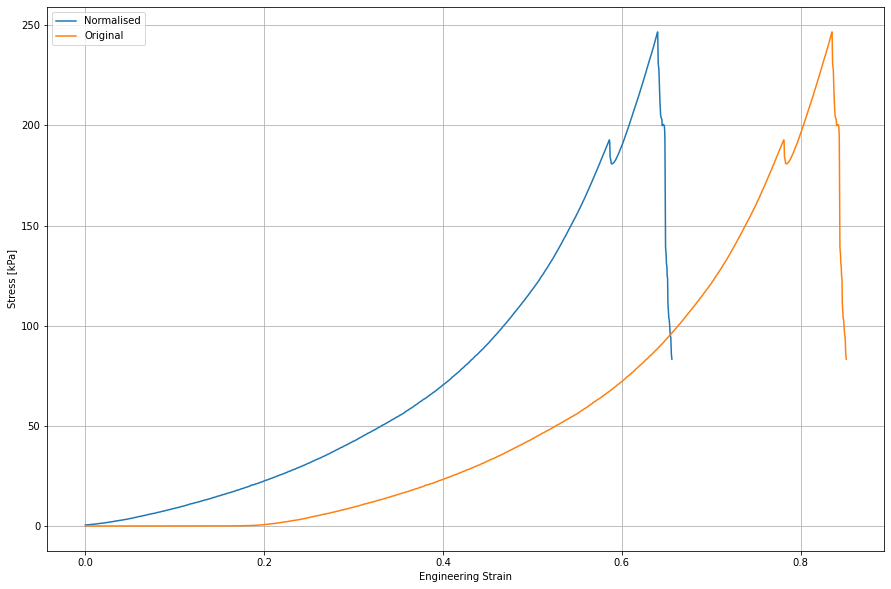

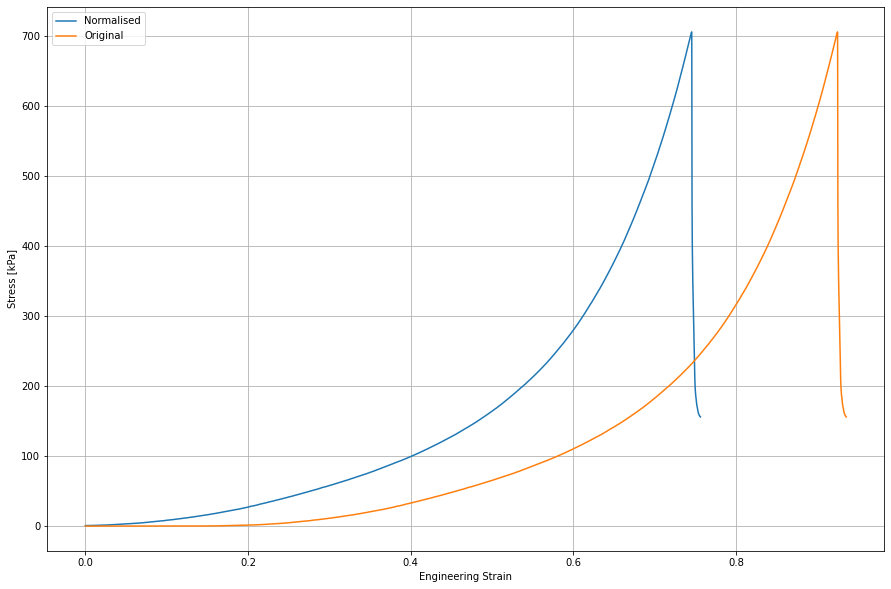

In [21]:
ax = GelMA1_cut.plot(y= 'Stress [kPa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA1.plot(ax = ax, y = 'Stress [kPa]', ylabel = "Stress [kPa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
plt.show()

ax1 = GelMA2_cut.plot(y= 'Stress [kPa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA2.plot(ax = ax1, y = 'Stress [kPa]', ylabel = "Stress [kPa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
plt.show()

ax2 = GelMA3_cut.plot(y= 'Stress [kPa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA3.plot(ax = ax2, y = 'Stress [kPa]', ylabel = "Stress [kPa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
plt.show()

ax3 = GelMA4_cut.plot(y= 'Stress [kPa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA4.plot(ax = ax3, y = 'Stress [kPa]', ylabel = "Stress [kPa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
plt.show()

ax4 = GelMA5_cut.plot(y= 'Stress [kPa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA5.plot(ax = ax4, y = 'Stress [kPa]', ylabel = "Stress [kPa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
#plt.savefig("GelMA only_SS_Dry.png")
plt.show()


## All Graphs of GelMA only (Normalised)_Non-max-cut 

### Force Stroke Plots (All)_Non-cut

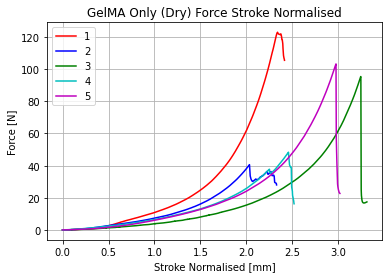

In [23]:
plt.plot(GelMA1_cut['Stroke Normalised'],GelMA1_cut['Force [N]'],color = 'r')
plt.plot(GelMA2_cut['Stroke Normalised'],GelMA2_cut['Force [N]'],color = 'b')
plt.plot(GelMA3_cut['Stroke Normalised'],GelMA3_cut['Force [N]'],color = 'g')
plt.plot(GelMA4_cut['Stroke Normalised'],GelMA4_cut['Force [N]'],color = 'c')
plt.plot(GelMA5_cut['Stroke Normalised'],GelMA5_cut['Force [N]'],color = 'm')
plt.grid()
plt.legend('12345')
plt.title('GelMA Only (Dry) Force Stroke Normalised')
plt.xlabel('Stroke Normalised [mm]')
plt.ylabel('Force [N]')
#plt.savefig("GelMA only_FS_Non-max-cut_Dry.png")
plt.show()

### Stress Strain Plots (All)_Non-cut

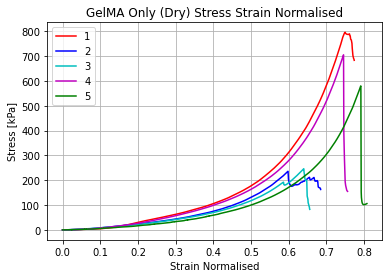

In [24]:
plt.plot(GelMA1_cut['Strain Normalised'],GelMA1_cut['Stress [kPa]'],color = 'r')
plt.plot(GelMA2_cut['Strain Normalised'],GelMA2_cut['Stress [kPa]'],color = 'b')
plt.plot(GelMA4_cut['Strain Normalised'],GelMA4_cut['Stress [kPa]'],color = 'c')
plt.plot(GelMA5_cut['Strain Normalised'],GelMA5_cut['Stress [kPa]'],color = 'm')
plt.plot(GelMA3_cut['Strain Normalised'],GelMA3_cut['Stress [kPa]'],color = 'g')
plt.grid()
plt.legend('12345')
plt.title('GelMA Only (Dry) Stress Strain Normalised')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [kPa]')
#plt.savefig("GelMA only_SS_Non-max-cut_Dry.png")
plt.show()

#norm_GelMA_Only = {'GelMA31_norm':GelMA31_cut['Strain Normalised'],
#                   'GelMA32_norm':GelMA32_cut['Strain Normalised'],
#                   'GelMA33_norm':GelMA33_cut['Strain Normalised'],
#                   'GelM34_norm':GelMA34_cut['Strain Normalised'],
#                   'GelMA35_norm':GelMA35_cut['Strain Normalised']}

#df_only = pd.DataFrame(norm_GelMA_Only)

#print(df_only)

In [25]:
GelMA1_cut

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised
3576,35.76,0.100533,0.595900,0.190994,651.213804,0.651214,0.000000,0.000000
3588,35.88,0.100533,0.597867,0.191624,651.213804,0.651214,0.000630,0.001967
3593,35.93,0.100136,0.598800,0.191923,648.639606,0.648640,0.000929,0.002900
3594,35.94,0.100692,0.598967,0.191977,652.243095,0.652243,0.000983,0.003067
3595,35.95,0.101089,0.599100,0.192019,654.817293,0.654817,0.001026,0.003200
...,...,...,...,...,...,...,...,...
18061,180.61,105.707500,3.010067,0.964765,684730.846982,684.730847,0.773771,2.414167
18062,180.62,105.654600,3.010233,0.964818,684388.181969,684.388182,0.773825,2.414333
18063,180.63,105.602700,3.010400,0.964872,684051.994556,684.051995,0.773878,2.414500
18064,180.64,105.539600,3.010533,0.964914,683643.258029,683.643258,0.773921,2.414633


## Max cutting

### GelMA31 Force and Stress [kPa]

In [26]:
#max_v31 = GelMA31_cut.max()
#print(max_v31)
#print(max_v31['Strain Normalised'])
 
#print("Max values of Force [N] and Stroke [mm]:")
#print(maxForceIndex31, ',', maxStrokeIndex31)

maxForceIndex1 = float(GelMA1_cut['Force [N]'].idxmax()) #position
maxStrokeIndex1 = float(GelMA1_cut['Stroke [mm]'].idxmax())

GelMA1_cut_max_FS = GelMA1_cut.loc[0:maxForceIndex1, 'Force [N]']

GelMA1_cut['Force Cut Max FS'] = GelMA1_cut_max_FS
GelMA1_cut

##Stress

maxStressIndex1 = float(GelMA1_cut['Stress [kPa]'].idxmax())
maxStrainIndex1 = float(GelMA1_cut['Strain Normalised'].idxmax())
 
GelMA1_cut_max_SS = GelMA1_cut.loc[0:maxStressIndex1, 'Stress [kPa]']

GelMA1_cut['Stress Cut Max SS'] = GelMA1_cut_max_SS

GelMA1_cut

#GelMA31_cut.drop('Stroke Normalised Max FS', axis=1, inplace=True)
#GelMA31_cut.drop('Strain Normalised Max SS', axis=1, inplace=True)

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_4192/3622242947.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA1_cut['Force Cut Max FS'] = GelMA1_cut_max_FS
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_4192/3622242947.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA1_cut['Stress Cut Max SS'] = GelMA1_cut_max_SS


,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
3576,35.76,0.100533,0.595900,0.190994,651.213804,0.651214,0.000000,0.000000,0.100533,0.651214
3588,35.88,0.100533,0.597867,0.191624,651.213804,0.651214,0.000630,0.001967,0.100533,0.651214
3593,35.93,0.100136,0.598800,0.191923,648.639606,0.648640,0.000929,0.002900,0.100136,0.648640
3594,35.94,0.100692,0.598967,0.191977,652.243095,0.652243,0.000983,0.003067,0.100692,0.652243
3595,35.95,0.101089,0.599100,0.192019,654.817293,0.654817,0.001026,0.003200,0.101089,0.654817
...,...,...,...,...,...,...,...,...,...,...
18061,180.61,105.707500,3.010067,0.964765,684730.846982,684.730847,0.773771,2.414167,NaN,NaN
18062,180.62,105.654600,3.010233,0.964818,684388.181969,684.388182,0.773825,2.414333,NaN,NaN
18063,180.63,105.602700,3.010400,0.964872,684051.994556,684.051995,0.773878,2.414500,NaN,NaN
18064,180.64,105.539600,3.010533,0.964914,683643.258029,683.643258,0.773921,2.414633,NaN,NaN


In [231]:
#GelMA31_cut['Force Cut Normalised'] = GelMA31_cut['Force Cut Max FS'] - GelMA31_cut.iloc[0]['Force Cut Max FS']
#GelMA31_cut

### GelMA32 Force and Stress

In [27]:
maxForceIndex2 = float(GelMA2_cut['Force [N]'].idxmax()) #position
maxStrokeIndex2 = float(GelMA2_cut['Stroke [mm]'].idxmax())


GelMA2_cut_max_FS = GelMA2_cut.loc[0:maxForceIndex2, 'Force [N]']

GelMA2_cut['Force Cut Max FS'] = GelMA2_cut_max_FS
GelMA2_cut

##Stress

maxStressIndex2 = float(GelMA2_cut['Stress [kPa]'].idxmax())
maxStrainIndex2 = float(GelMA2_cut['Strain Normalised'].idxmax())
 
GelMA2_cut_max_SS = GelMA2_cut.loc[0:maxStressIndex2, 'Stress [kPa]']

GelMA2_cut['Stress Cut Max SS'] = GelMA2_cut_max_SS

GelMA2_cut


/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_4192/2768178626.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA2_cut['Force Cut Max FS'] = GelMA2_cut_max_FS
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_4192/2768178626.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA2_cut['Stress Cut Max SS'] = GelMA2_cut_max_SS


,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
1244,12.44,0.100931,0.207300,0.060971,587.484206,0.587484,0.000000,0.000000,0.100931,0.587484
1245,12.45,0.102043,0.207467,0.061020,593.960877,0.593961,0.000049,0.000167,0.102043,0.593961
1246,12.46,0.102043,0.207667,0.061078,593.960877,0.593961,0.000108,0.000367,0.102043,0.593961
1247,12.47,0.101884,0.207833,0.061127,593.035389,0.593035,0.000157,0.000533,0.101884,0.593035
1248,12.48,0.102043,0.208000,0.061176,593.960877,0.593961,0.000206,0.000700,0.102043,0.593961
...,...,...,...,...,...,...,...,...,...,...
15212,152.12,28.148250,2.535367,0.745696,163841.973407,163.841973,0.684726,2.328067,NaN,NaN
15213,152.13,28.119010,2.535500,0.745735,163671.776705,163.671777,0.684765,2.328200,NaN,NaN
15214,152.14,28.095880,2.535667,0.745784,163537.144362,163.537144,0.684814,2.328367,NaN,NaN
15215,152.15,28.075930,2.535767,0.745814,163421.021784,163.421022,0.684843,2.328467,NaN,NaN


### GelMA33 Force and Stress

In [28]:
maxForceIndex3 = float(GelMA3_cut['Force [N]'].idxmax()) #position
maxStrokeIndex3 = float(GelMA3_cut['Stroke [mm]'].idxmax())


GelMA3_cut_max_FS = GelMA3_cut.loc[0:maxForceIndex3, 'Force [N]']

GelMA3_cut['Force Cut Max FS'] = GelMA3_cut_max_FS
GelMA3_cut

##Stress

maxStressIndex3 = float(GelMA3_cut['Stress [kPa]'].idxmax())
maxStrainIndex3 = float(GelMA3_cut['Strain Normalised'].idxmax())
 
GelMA3_cut_max_SS = GelMA3_cut.loc[0:maxStressIndex3, 'Stress [kPa]']

GelMA3_cut['Stress Cut Max SS'] = GelMA3_cut_max_SS

GelMA3_cut

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_4192/2413397168.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA3_cut['Force Cut Max FS'] = GelMA3_cut_max_FS
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_4192/2413397168.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA3_cut['Stress Cut Max SS'] = GelMA3_cut_max_SS


,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
1719,17.19,0.100374,0.286467,0.069870,610.372774,0.610373,0.000000,0.000000,0.100374,0.610373
1725,17.25,0.100136,0.287467,0.070114,608.923070,0.608923,0.000244,0.001000,0.100136,0.608923
1726,17.26,0.100295,0.287633,0.070154,609.889336,0.609889,0.000285,0.001167,0.100295,0.609889
1727,17.27,0.101089,0.287833,0.070203,614.722494,0.614722,0.000333,0.001367,0.101089,0.614722
1728,17.28,0.101884,0.287967,0.070236,619.555043,0.619555,0.000366,0.001500,0.101884,0.619555
...,...,...,...,...,...,...,...,...,...,...
21584,215.84,17.473380,3.597300,0.877390,106255.147419,106.255147,0.807520,3.310833,NaN,NaN
21585,215.85,17.481170,3.597467,0.877431,106302.518196,106.302518,0.807561,3.311000,NaN,NaN
21586,215.86,17.489670,3.597633,0.877471,106354.206465,106.354206,0.807602,3.311166,NaN,NaN
21587,215.87,17.498570,3.597733,0.877496,106408.327122,106.408327,0.807626,3.311266,NaN,NaN


### GelMA34 Force and Stress

In [29]:
maxForceIndex4 = float(GelMA4_cut['Force [N]'].idxmax()) #position
maxStrokeIndex4 = float(GelMA4_cut['Stroke [mm]'].idxmax())


GelMA4_cut_max_FS = GelMA4_cut.loc[0:maxForceIndex4, 'Force [N]']

GelMA4_cut['Force Cut Max FS'] = GelMA4_cut_max_FS
GelMA4_cut

##Stress

maxStressIndex4 = float(GelMA4_cut['Stress [kPa]'].idxmax())
maxStrainIndex4 = float(GelMA4_cut['Strain Normalised'].idxmax())
 
GelMA4_cut_max_SS = GelMA4_cut.loc[0:maxStressIndex4, 'Stress [kPa]']

GelMA4_cut['Stress Cut Max SS'] = GelMA4_cut_max_SS

GelMA4_cut

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_4192/4252945389.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA4_cut['Force Cut Max FS'] = GelMA4_cut_max_FS
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_4192/4252945389.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA4_cut['Stress Cut Max SS'] = GelMA4_cut_max_SS


,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
4494,44.94,0.100136,0.748933,0.195035,510.722883,0.510723,0.000000,0.000000,0.100136,0.510723
4495,44.95,0.100772,0.749100,0.195078,513.965655,0.513966,0.000043,0.000167,0.100772,0.513966
4496,44.96,0.101328,0.749267,0.195122,516.802953,0.516803,0.000087,0.000333,0.101328,0.516803
4497,44.97,0.101487,0.749433,0.195165,517.613391,0.517613,0.000130,0.000500,0.101487,0.517613
4498,44.98,0.101487,0.749600,0.195208,517.613391,0.517613,0.000174,0.000667,0.101487,0.517613
...,...,...,...,...,...,...,...,...,...,...
19606,196.06,16.424740,3.267633,0.850946,83771.144368,83.771144,0.655911,2.518700,NaN,NaN
19607,196.07,16.397160,3.267767,0.850981,83630.478022,83.630478,0.655946,2.518834,NaN,NaN
19608,196.08,16.373400,3.267900,0.851016,83509.294832,83.509295,0.655981,2.518967,NaN,NaN
19609,196.09,16.352970,3.268000,0.851042,83405.095649,83.405096,0.656007,2.519067,NaN,NaN


### GelMA35 Force and Stress 

In [30]:
maxForceIndex5 = float(GelMA5_cut['Force [N]'].idxmax()) #position
maxStrokeIndex5 = float(GelMA5_cut['Stroke [mm]'].idxmax())

GelMA5_cut_max_FS = GelMA5_cut.loc[0:maxForceIndex5, 'Force [N]']

GelMA5_cut['Force Cut Max FS'] = GelMA5_cut_max_FS
GelMA5_cut

##Stress

maxStressIndex5 = float(GelMA5_cut['Stress [kPa]'].idxmax())
maxStrainIndex5 = float(GelMA5_cut['Strain Normalised'].idxmax())
 
GelMA5_cut_max_SS = GelMA5_cut.loc[0:maxStressIndex5, 'Stress [kPa]']

GelMA5_cut['Stress Cut Max SS'] = GelMA5_cut_max_SS

GelMA5_cut

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_4192/2847834717.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA5_cut['Force Cut Max FS'] = GelMA5_cut_max_FS
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_4192/2847834717.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA5_cut['Stress Cut Max SS'] = GelMA5_cut_max_SS


,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
4294,42.94,0.100692,0.715567,0.179340,688.082027,0.688082,0.000000,0.000000,0.100692,0.688082
4295,42.95,0.100533,0.715733,0.179382,686.996180,0.686996,0.000042,0.000167,0.100533,0.686996
4299,42.99,0.101089,0.716433,0.179557,690.797670,0.690798,0.000217,0.000867,0.101089,0.690798
4300,43.00,0.101328,0.716600,0.179599,692.426783,0.692427,0.000259,0.001033,0.101328,0.692427
4301,43.01,0.100692,0.716767,0.179641,688.082027,0.688082,0.000301,0.001200,0.100692,0.688082
...,...,...,...,...,...,...,...,...,...,...
22398,223.98,22.818720,3.732900,0.935564,155932.303743,155.932304,0.756224,3.017333,NaN,NaN
22399,223.99,22.811330,3.733100,0.935614,155881.803990,155.881804,0.756274,3.017533,NaN,NaN
22400,224.00,22.803230,3.733267,0.935656,155826.452434,155.826452,0.756316,3.017700,NaN,NaN
22401,224.01,22.796150,3.733367,0.935681,155778.071074,155.778071,0.756341,3.017800,NaN,NaN


In [236]:
#data = [GelMA31_cut_max_FS, GelMA32_cut_max_FS, GelMA33_cut_max_FS, GelMA34_cut_max_FS, GelMA35_cut_max_FS]
#All_GelMA_Force = pd.DataFrame(data,columns=['31','32', '33', '34', '35'])

#print (All_GelMA_Force)

In [237]:
#All_GelMA_Force

In [238]:
#pd.core.frame.DataFrame(All_GelMA_Force)
#All_GelMA_Force.rename(columns={"Force":"Force [N]",
#                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
#          ,inplace=True)

## Plots of Max cutting 

### Force Stroke Plots (All)_Cut

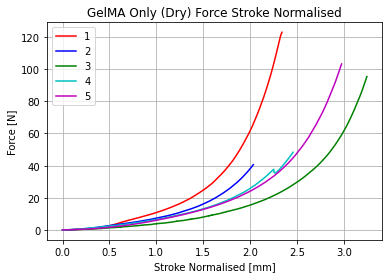

In [31]:
plt.plot(GelMA1_cut['Stroke Normalised'],GelMA1_cut['Force Cut Max FS'],color = 'r')
plt.plot(GelMA2_cut['Stroke Normalised'],GelMA2_cut['Force Cut Max FS'],color = 'b')
plt.plot(GelMA3_cut['Stroke Normalised'],GelMA3_cut['Force Cut Max FS'],color = 'g')
plt.plot(GelMA4_cut['Stroke Normalised'],GelMA4_cut['Force Cut Max FS'],color = 'c')
plt.plot(GelMA5_cut['Stroke Normalised'],GelMA5_cut['Force Cut Max FS'],color = 'm')
plt.grid(visible = True)
plt.legend('12345')
plt.title('GelMA Only (Dry) Force Stroke Normalised')
plt.xlabel('Stroke Normalised [mm]')
plt.ylabel('Force [N]')
#plt.savefig("GelMA only_FS_Cut_Dry.png")
plt.show()

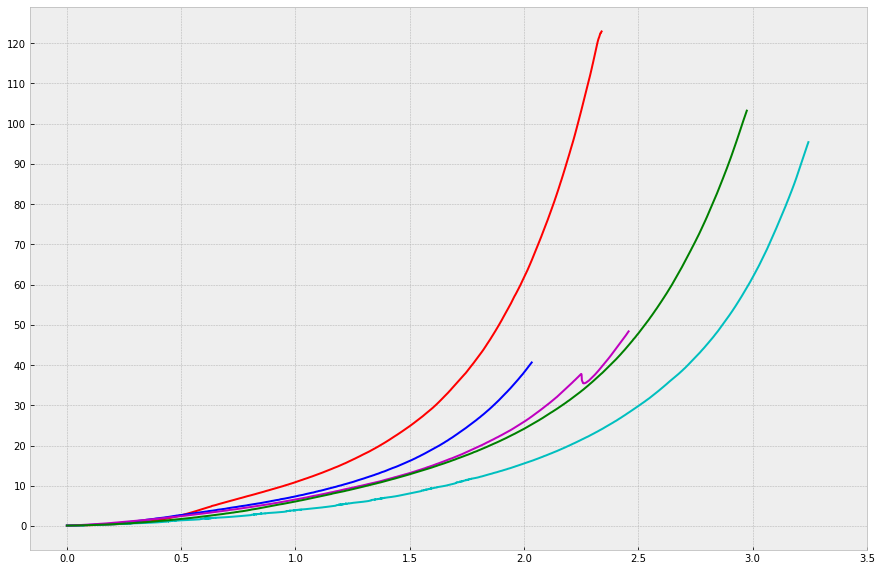

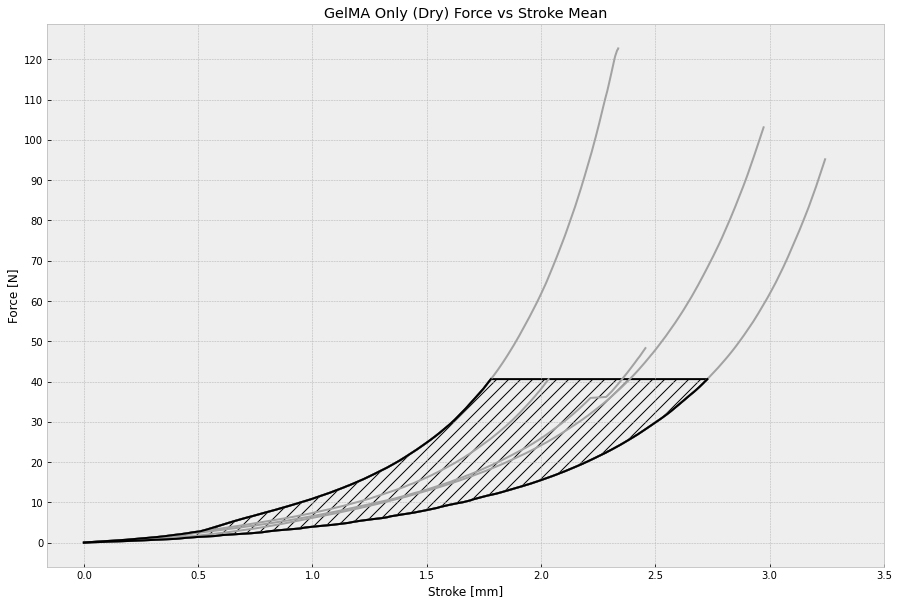

,xmin,xmax,y_common
0,0.000000,0.000000,0.000000
1,0.057048,0.113538,0.233341
2,0.124988,0.224540,0.466682
3,0.184596,0.314056,0.700023
4,0.231067,0.403162,0.933364
...,...,...,...
29995,NaN,NaN,6999.066636
29996,NaN,NaN,6999.299977
29997,NaN,NaN,6999.533318
29998,NaN,NaN,6999.766659


In [43]:
d1 = GelMA1_cut['Stroke Normalised']
d2 = GelMA2_cut['Stroke Normalised']
d3 = GelMA3_cut['Stroke Normalised']
d4 = GelMA4_cut['Stroke Normalised']
d5 = GelMA5_cut['Stroke Normalised']

y1 = GelMA1_cut['Force Cut Max FS']
y2 = GelMA2_cut['Force Cut Max FS']
y3 = GelMA3_cut['Force Cut Max FS']
y4 = GelMA4_cut['Force Cut Max FS']
y5 = GelMA5_cut['Force Cut Max FS']

y_common = np.linspace(0,7000,30000)

x1 = np.interp(y_common,y1,d1)
x2 = np.interp(y_common,y2,d2)
x3 = np.interp(y_common,y3,d3)
x4 = np.interp(y_common,y4,d4)
x5 = np.interp(y_common,y5,d5)

x = np.stack((x1,x2,x3,x4,x5))

xmax = np.max(x,axis=0)
xmin = np.min(x,axis=0)

%matplotlib inline
plt.style.use('bmh')
fig = plt.figure(figsize=(15,10))

plt.plot(d1,y1,'red')
plt.plot(d2,y2,'blue')
plt.plot(d3,y3,'c')
plt.plot(d4,y4,'m')
plt.plot(d5,y5,'green')

plt.xticks(np.arange(0,4,0.5))
plt.yticks(np.arange(0,125,10))

plt.show()



fig = plt.figure(figsize=(15,10))

plt.plot(x1,y_common,'#A2A2A2')
plt.plot(x2,y_common,'#A2A2A2')
plt.plot(x3,y_common,'#A2A2A2')
plt.plot(x4,y_common,'#A2A2A2')
plt.plot(x5,y_common,'#A2A2A2')

plt.plot(xmax,y_common,'black')
plt.plot(xmin,y_common,'black')

plt.rcParams['hatch.color'] = 'black'
plt.fill_betweenx(y_common, xmax, xmin, facecolor='none', hatch ='//', edgecolor='black', linewidth=2)

plt.xticks(np.arange(0,4,0.5))
plt.yticks(np.arange(0,125,10))

plt.title('GelMA Only (Dry) Force vs Stroke Mean')
plt.xlabel('Stroke [mm]')
plt.ylabel('Force [N]')
#plt.savefig("GelMA Only_FS_Cut_Mean_dry.png")

plt.show()

GelMA_Only_FS_dry = {'xmin':xmin,
                  'xmax':xmax,
                'y_common':y_common}

GelMA_Only_FS_M_dry = pd.DataFrame(GelMA_Only_FS_dry) 

GelMA_Only_FS_M_dry

#GelMA_Only_FS_M_dry.to_csv('GelMA_Only_FS_M_dry.csv')

### Stress Strain Plots (All)_Cut

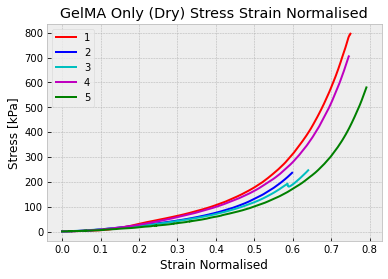

In [36]:
plt.plot(GelMA1_cut['Strain Normalised'],GelMA1_cut['Stress Cut Max SS'],color = 'r')
plt.plot(GelMA2_cut['Strain Normalised'],GelMA2_cut['Stress Cut Max SS'],color = 'b')
plt.plot(GelMA4_cut['Strain Normalised'],GelMA4_cut['Stress Cut Max SS'],color = 'c')
plt.plot(GelMA5_cut['Strain Normalised'],GelMA5_cut['Stress Cut Max SS'],color = 'm')
plt.plot(GelMA3_cut['Strain Normalised'],GelMA3_cut['Stress Cut Max SS'],color = 'g')
plt.grid(visible = True)
plt.legend('12345')
plt.title('GelMA Only (Dry) Stress Strain Normalised')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [kPa]')
#plt.savefig("GelMA only_SS_Cut_dry.png")
plt.show()

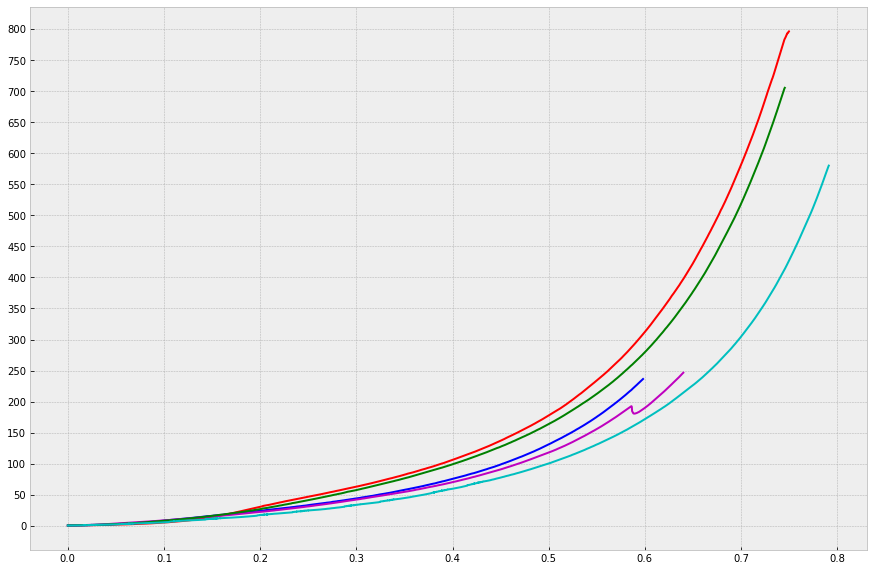

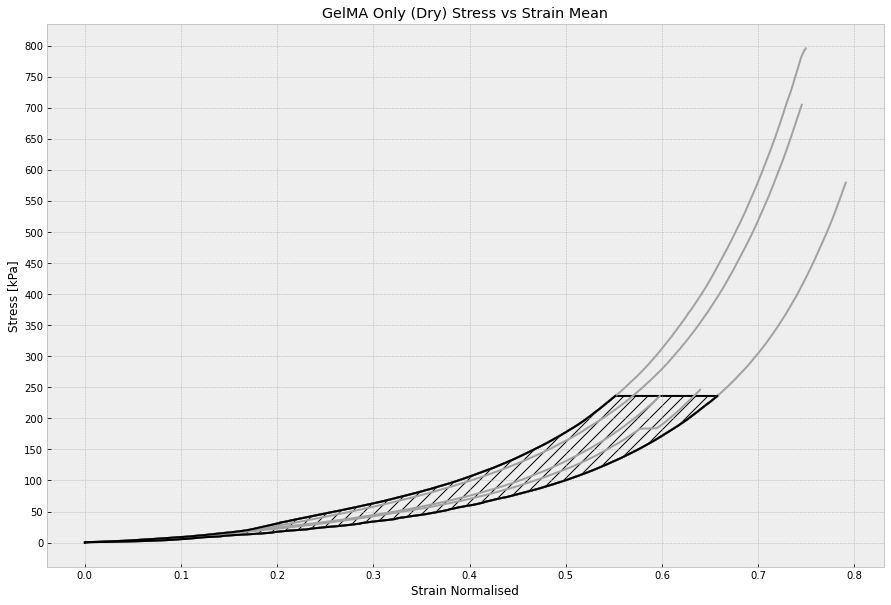

,xmin,xmax,y_common
0,0.000000,0.000000,0.000000
1,0.000000,0.004434,0.666889
2,0.016878,0.030541,1.333778
3,0.027300,0.049254,2.000667
4,0.036845,0.064145,2.667556
...,...,...,...
2995,NaN,NaN,1997.332444
2996,NaN,NaN,1997.999333
2997,NaN,NaN,1998.666222
2998,NaN,NaN,1999.333111


In [42]:
d6 = GelMA1_cut['Strain Normalised']
d7 = GelMA2_cut['Strain Normalised']
d8 = GelMA3_cut['Strain Normalised']
d9 = GelMA4_cut['Strain Normalised']
d10 = GelMA5_cut['Strain Normalised']

y6 = GelMA1_cut['Stress Cut Max SS']
y7 = GelMA2_cut['Stress Cut Max SS']
y8 = GelMA3_cut['Stress Cut Max SS']
y9 = GelMA4_cut['Stress Cut Max SS']
y10 = GelMA5_cut['Stress Cut Max SS']

#y_common_2 = np.linspace(0,2000000,30000) #Pa
y_common_2 = np.linspace(0,2000,3000) #kPa


x6 = np.interp(y_common_2,y6,d6)
x7 = np.interp(y_common_2,y7,d7)
x8 = np.interp(y_common_2,y8,d8)
x9 = np.interp(y_common_2,y9,d9)
x10 = np.interp(y_common_2,y10,d10)

x_2 = np.stack((x6,x7,x8,x9,x10))

xmax_2 = np.max(x_2,axis=0)
xmin_2 = np.min(x_2,axis=0)

%matplotlib inline
plt.style.use('bmh')
fig = plt.figure(figsize=(15,10))

plt.plot(d6,y6,'red')
plt.plot(d7,y7,'blue')
plt.plot(d9,y9,'m')
plt.plot(d10,y10,'green')
plt.plot(d8,y8,'c')

#plt.xticks(np.arange(0,0.85,0.1))
#plt.yticks(np.arange(0,810000,20000))

plt.xticks(np.arange(0,0.85,0.1))
plt.yticks(np.arange(0,810,50))

plt.show()



fig = plt.figure(figsize=(15,10))

plt.plot(x6,y_common_2,'#A2A2A2')
plt.plot(x7,y_common_2,'#A2A2A2')
plt.plot(x8,y_common_2,'#A2A2A2')
plt.plot(x9,y_common_2,'#A2A2A2')
plt.plot(x10,y_common_2,'#A2A2A2')

plt.plot(xmax_2,y_common_2,'black')
plt.plot(xmin_2,y_common_2,'black')

plt.rcParams['hatch.color'] = 'black'
plt.fill_betweenx(y_common_2, xmax_2, xmin_2, facecolor='none', hatch ='//', edgecolor='black', linewidth=2)

#plt.xticks(np.arange(0,0.65,0.1))
#plt.yticks(np.arange(0,810000,20000))

plt.xticks(np.arange(0,0.85,0.1))
plt.yticks(np.arange(0,810,50))

plt.title('GelMA Only (Dry) Stress vs Strain Mean')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [kPa]')
#plt.savefig("GelMA Only_SS_Cut_Mean.png")

plt.show()

GelMA_Only_SS = {'xmin':xmin_2,
                  'xmax':xmax_2,
                'y_common':y_common_2}

GelMA_Only_SS_M = pd.DataFrame(GelMA_Only_SS) 

GelMA_Only_SS_M

#GelMA_Only_SS_M.to_csv('GelMA_Only_SS_M.csv') #[kPa]

## Mean of the samples 

### Force_stroke Mean 

In [44]:
GelMA1_cut

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
3576,35.76,0.100533,0.595900,0.190994,651.213804,0.651214,0.000000,0.000000,0.100533,0.651214
3588,35.88,0.100533,0.597867,0.191624,651.213804,0.651214,0.000630,0.001967,0.100533,0.651214
3593,35.93,0.100136,0.598800,0.191923,648.639606,0.648640,0.000929,0.002900,0.100136,0.648640
3594,35.94,0.100692,0.598967,0.191977,652.243095,0.652243,0.000983,0.003067,0.100692,0.652243
3595,35.95,0.101089,0.599100,0.192019,654.817293,0.654817,0.001026,0.003200,0.101089,0.654817
...,...,...,...,...,...,...,...,...,...,...
18061,180.61,105.707500,3.010067,0.964765,684730.846982,684.730847,0.773771,2.414167,NaN,NaN
18062,180.62,105.654600,3.010233,0.964818,684388.181969,684.388182,0.773825,2.414333,NaN,NaN
18063,180.63,105.602700,3.010400,0.964872,684051.994556,684.051995,0.773878,2.414500,NaN,NaN
18064,180.64,105.539600,3.010533,0.964914,683643.258029,683.643258,0.773921,2.414633,NaN,NaN


In [253]:
#GelMA_Force1 = GelMA31_cut
#GelMA_Force1 = GelMA_Force.drop(['Time [sec]', 'Force [N]', 'Stroke [mm]', 'Engineering Strain', 'Stress [Pa]', 'Strain Normalised', 'Stroke Normalised', 'Stress Cut Max SS'], axis=1, inplace=True)
#GelMA_Force1

#GelMA_Force2 = GelMA32_cut
#GelMA_Force2 = GelMA_Force2.drop(['Time [sec]', 'Force [N]', 'Stroke [mm]', 'Engineering Strain', 'Stress [Pa]', 'Strain Normalised', 'Stroke Normalised', 'Stress Cut Max SS'], axis=1, inplace=True)
#GelMA_Force2

#GelMA_Force3 = GelMA33_cut
#GelMA_Force3 = GelMA_Force3.drop(['Time [sec]', 'Force [N]', 'Stroke [mm]', 'Engineering Strain', 'Stress [Pa]', 'Strain Normalised', 'Stroke Normalised', 'Stress Cut Max SS'], axis=1, inplace=True)
#GelMA_Force3

#GelMA_Force4 = GelMA34_cut
#GelMA_Force4 = GelMA_Force4.drop(['Time [sec]', 'Force [N]', 'Stroke [mm]', 'Engineering Strain', 'Stress [Pa]', 'Strain Normalised', 'Stroke Normalised', 'Stress Cut Max SS'], axis=1, inplace=True)
#GelMA_Force4

#GelMA_Force5 = GelMA34_cut
#GelMA_Force5 = GelMA_Force4.drop(['Time [sec]', 'Force [N]', 'Stroke [mm]', 'Engineering Strain', 'Stress [Pa]', 'Strain Normalised', 'Stroke Normalised', 'Stress Cut Max SS'], axis=1, inplace=True)
#GelMA_Force5

#GelMA_Force1['32'] = GelMA_Force2['Force Cut Max FS'] - GelMA_Force2.iloc[0]['Force Cut Max FS']
#GelMA_Force1


In [45]:
All_GelMA_force ={'GelMA1':GelMA1_cut['Force Cut Max FS'], 
                     'GelMA2':GelMA2_cut['Force Cut Max FS'], 
                     'GelMA3':GelMA3_cut['Force Cut Max FS'], 
                     'GelMA4':GelMA4_cut['Force Cut Max FS'],
                    'GelMA5':GelMA5_cut['Force Cut Max FS']}


All_GelMA_stroke = {'GelMA1':GelMA1_cut['Stroke Normalised'], 
                     'GelMA2':GelMA2_cut['Stroke Normalised'], 
                     'GelMA3':GelMA3_cut['Stroke Normalised'], 
                     'GelMA4':GelMA4_cut['Stroke Normalised'],
                    'GelMA5':GelMA5_cut['Stroke Normalised']}

All_GelMA_force
All_GelMA_stroke

df0_force = pd.DataFrame(All_GelMA_force)
df0_stroke = pd.DataFrame(All_GelMA_stroke)

#df1_force
#df1_stroke

#GelMA_force_mean = df1_force.mean(numeric_only = True, axis = 1)
#GelMA_stroke_mean = df1_stroke.mean(numeric_only = True, axis = 1)

#df1_force

#All_GelMA_force
#df1_force

#GelMA_force_mean


#maxForce = float(df1_force['GelMA_force_mean'].idxmax()) #position
#GelMA_FS_Mean = df1_force.loc[0:maxForce, 'GelMA_force_mean']
#GelMA_FS_Mean


#df1_force_1 = df1_force['GelMA_force_mean'].tolist([df1_force.index < 21899])
#df1_force_1


#df1_GelMA_Only_FS = {'GelMA Force Mean':GelMA_force_mean,
#                  'GelMA Stroke Mean':GelMA_stroke_mean}

#GelMA_Only_FS_M = pd.DataFrame(df1_GelMA_Only_FS) 

#GelMA_Only_FS_M

#GelMA_Only_FS_M.to_csv('GelMA_Only_FS_Mean.csv')

#numeric_only = true
#.tolist()
#[.index < #]





from numpy import array


#F = array([All_GelMA_force[k] for k in All_GelMA_force]).mean(axis = 0)

#Strk = array([All_GelMA_stroke[k] for k in All_GelMA_stroke]).mean(axis = 0)




from math import nan, isnan

#F_nan = [x for x in F if isnan(x) == False]
#F1 = pd.DataFrame(F_nan)

#FStd = array(pd.DataFrame(All_GelMA_force).std(numeric_only = True, axis = 1))
#F_nan_std = [x for x in FStd if isnan(x) == False]


#F1['Std'] = pd.DataFrame(F_nan_std)
#F1.columns = ['Mean', 'Std']

#F1['Mean'] = F1['Mean'] - F1.iloc[0]['Mean'] #Normalise Y (due to difference in starting points between samples)


#F1['Error1'] = F1['Mean'] - F1['Std']
#F1['Error2'] = F1['Mean'] + F1['Std']




#Strk_nan = [x for x in Strk if isnan(x) == False]
#Strk1 = pd.DataFrame(Strk_nan)

#StrkStd = array(pd.DataFrame(All_GelMA_stroke).std(numeric_only = True, axis = 1))
#Strk_nan_std = [x for x in StrkStd if isnan(x) == False]

#Strk1['Std'] = pd.DataFrame(Strk_nan_std)
#Strk1.columns = ['Mean', 'Std']

#Strk1['Error1'] = Strk1['Mean'] - Strk1['Std']
#Strk1['Error2'] = Strk1['Mean'] + Strk1['Std']



#Strk1['Mean'] = Strk1['Mean'] - Strk1.iloc[0]['Mean'] #to zero
#maxForcemean = float(F1['Mean'].idxmax()) #position; same shape as force

#Strk1['Mean'] = Strk1.loc[0:maxForcemean, 'Mean']
#Strk1['Std'] = Strk1.loc[0:maxForcemean, 'Std']
#Strk1['Error1'] = Strk1.loc[0:maxForcemean, 'Error1']
#Strk1['Error2'] = Strk1.loc[0:maxForcemean, 'Error2']

#Strk1 = Strk1[Strk1['Mean'].notnull()]
#Strk1

#F1

#F1.to_csv('F1_only.csv')
#Strk1.to_csv('Strk1_only.csv')

df0_force['s1'] = df0_stroke['GelMA1']
df0_force['s2'] = df0_stroke['GelMA2']
df0_force['s3'] = df0_stroke['GelMA3']
df0_force['s4'] = df0_stroke['GelMA4']
df0_force['s5'] = df0_stroke['GelMA5']

df0_force



,GelMA1,GelMA2,GelMA3,GelMA4,GelMA5,s1,s2,s3,s4,s5
1244,NaN,0.100931,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
1245,NaN,0.102043,NaN,NaN,NaN,NaN,0.000167,NaN,NaN,NaN
1246,NaN,0.102043,NaN,NaN,NaN,NaN,0.000367,NaN,NaN,NaN
1247,NaN,0.101884,NaN,NaN,NaN,NaN,0.000533,NaN,NaN,NaN
1248,NaN,0.102043,NaN,NaN,NaN,NaN,0.000700,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
22398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.017333
22399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.017533
22400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.017700
22401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.017800


In [50]:
#Force (G1-G5)

G1 = [x for x in df0_force['GelMA1'] if isnan(x) == False]
G2 = [x for x in df0_force['GelMA2'] if isnan(x) == False]
G3 = [x for x in df0_force['GelMA3'] if isnan(x) == False]
G4 = [x for x in df0_force['GelMA4'] if isnan(x) == False]
G5 = [x for x in df0_force['GelMA5'] if isnan(x) == False]

#Stroke (G6-G10)
G6 = [x for x in df0_force['s1'] if isnan(x) == False]
G7 = [x for x in df0_force['s2'] if isnan(x) == False]
G8 = [x for x in df0_force['s3'] if isnan(x) == False]
G9 = [x for x in df0_force['s4'] if isnan(x) == False]
G10 = [x for x in df0_force['s5'] if isnan(x) == False]

dfG1 = pd.DataFrame(G1)
dfG2 = pd.DataFrame(G2)
dfG3 = pd.DataFrame(G3)
dfG4 = pd.DataFrame(G4)
dfG5 = pd.DataFrame(G5)

dfG6 = pd.DataFrame(G6)
dfG7 = pd.DataFrame(G7)
dfG8 = pd.DataFrame(G8)
dfG9 = pd.DataFrame(G9)
dfG10 = pd.DataFrame(G10)

dFONLY = dfG1
dFONLY['2'] = dfG2
dFONLY['3'] = dfG3
dFONLY['4'] = dfG4
dFONLY['5'] = dfG5

dFONLY['6'] = dfG6
dFONLY['7'] = dfG7
dFONLY['8'] = dfG8
dFONLY['9'] = dfG9
dFONLY['10'] = dfG10


dFONLY.columns = ['F1','F2','F3','F4','F5','S1','S2','S3','S4','S5']
dFONLY

#df0 = dFONLY[['F1','F2','F3','F4','F5']]
#ds0 = dFONLY[['S1','S2','S3','S4','S5']]

dFONLY

len(dfG2) #shorter, 12202

############# df = df.iloc[row_start:row_end , col_start, col_end]

dFONLY = dFONLY.iloc[0:12202, :]
dFONLY

df0 = dFONLY[['F1','F2','F3','F4','F5']]
ds0 = dFONLY[['S1','S2','S3','S4','S5']]


df0

,F1,F2,F3,F4,F5
0,0.100533,0.100931,0.100374,0.100136,0.100692
1,0.100533,0.102043,0.100136,0.100772,0.100533
2,0.100136,0.102043,0.100295,0.101328,0.101089
3,0.100692,0.101884,0.101089,0.101487,0.101328
4,0.101089,0.102043,0.101884,0.101487,0.100692
...,...,...,...,...,...
12197,66.235220,40.590760,16.205310,27.163900,25.222460
12198,66.255810,40.604510,16.208250,27.170900,25.227710
12199,66.278780,40.616750,16.211190,27.178680,25.233590
12200,66.303490,40.627240,16.213660,27.186790,25.239940


In [51]:
F_dF = array([df0[k] for k in df0]).mean(axis = 0)
S_dF = array([ds0[k] for k in ds0]).mean(axis = 0)


F1 = pd.DataFrame(F_dF) #force
Strk1 = pd.DataFrame(S_dF) #stroke


FStd = array(pd.DataFrame(df0).std(numeric_only = True, axis = 1))
F_nan_std = [x for x in FStd if isnan(x) == False]

StrkStd = array(pd.DataFrame(ds0).std(numeric_only = True, axis = 1))
Strk_nan_std = [x for x in StrkStd if isnan(x) == False]


F1['Std'] = pd.DataFrame(F_nan_std)
F1.columns = ['Mean', 'Std']

Strk1['Std'] = pd.DataFrame(Strk_nan_std)
Strk1.columns = ['Mean', 'Std']



F1['Error1'] = F1['Mean'] - F1['Std']
F1['Error2'] = F1['Mean'] + F1['Std']


Strk1['Error1'] = Strk1['Mean'] - Strk1['Std']
Strk1['Error2'] = Strk1['Mean'] + Strk1['Std']


F1, Strk1



(            Mean        Std     Error1     Error2
 0       0.100533   0.000303   0.100231   0.100836
 1       0.100803   0.000730   0.100074   0.101533
 2       0.100978   0.000782   0.100196   0.101760
 3       0.101296   0.000445   0.100851   0.101741
 4       0.101439   0.000558   0.100881   0.101997
 ...          ...        ...        ...        ...
 12197  35.083530  19.475021  15.608509  54.558551
 12198  35.093436  19.482138  15.611298  54.575574
 12199  35.103798  19.489942  15.613856  54.593740
 12200  35.114224  19.498338  15.615886  54.612562
 12201  35.122616  19.505914  15.616702  54.628530
 
 [12202 rows x 4 columns],
            Mean       Std    Error1    Error2
 0      0.000000  0.000000  0.000000  0.000000
 1      0.000693  0.000798 -0.000105  0.001491
 2      0.001127  0.001051  0.000075  0.002178
 3      0.001300  0.001052  0.000248  0.002352
 4      0.001453  0.001037  0.000416  0.002491
 ...         ...       ...       ...       ...
 12197  2.033993  0.001076  2.

In [52]:
Strk1.shape, F1.shape

((12202, 4), (12202, 4))

In [53]:
GelMA4_cut

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
4494,44.94,0.100136,0.748933,0.195035,510.722883,0.510723,0.000000,0.000000,0.100136,0.510723
4495,44.95,0.100772,0.749100,0.195078,513.965655,0.513966,0.000043,0.000167,0.100772,0.513966
4496,44.96,0.101328,0.749267,0.195122,516.802953,0.516803,0.000087,0.000333,0.101328,0.516803
4497,44.97,0.101487,0.749433,0.195165,517.613391,0.517613,0.000130,0.000500,0.101487,0.517613
4498,44.98,0.101487,0.749600,0.195208,517.613391,0.517613,0.000174,0.000667,0.101487,0.517613
...,...,...,...,...,...,...,...,...,...,...
19606,196.06,16.424740,3.267633,0.850946,83771.144368,83.771144,0.655911,2.518700,NaN,NaN
19607,196.07,16.397160,3.267767,0.850981,83630.478022,83.630478,0.655946,2.518834,NaN,NaN
19608,196.08,16.373400,3.267900,0.851016,83509.294832,83.509295,0.655981,2.518967,NaN,NaN
19609,196.09,16.352970,3.268000,0.851042,83405.095649,83.405096,0.656007,2.519067,NaN,NaN


### Stress_Strain Mean 

In [54]:
All_GelMA_stress = {'GelMA1':GelMA1_cut['Stress Cut Max SS'], 
                     'GelMA2':GelMA2_cut['Stress Cut Max SS'], 
                     'GelMA3':GelMA3_cut['Stress Cut Max SS'], 
                     'GelMA4':GelMA4_cut['Stress Cut Max SS'],
                    'GelMA5':GelMA5_cut['Stress Cut Max SS']}

All_GelMA_strain = {'GelMA1':GelMA1_cut['Strain Normalised'], 
                     'GelMA2':GelMA2_cut['Strain Normalised'], 
                     'GelMA3':GelMA3_cut['Strain Normalised'], 
                     'GelMA4':GelMA4_cut['Strain Normalised'],
                    'GelMA5':GelMA5_cut['Strain Normalised']}

All_GelMA_stress
All_GelMA_strain

df0_stress = pd.DataFrame(All_GelMA_stress)
df0_strain = pd.DataFrame(All_GelMA_strain)

#df1_stress
#df1_strain

#GelMA_stress_mean = df1_stress.mean(axis = 1)
#GelMA_strain_mean = df1_strain.mean(axis = 1)

#GelMA_stress_mean

#df1_GelMA_Only_SS = {'GelMA Force Mean':GelMA_stress_mean,
#                  'GelMA Stroke Mean':GelMA_strain_mean}

#GelMA_Only_SS_M = pd.DataFrame(df1_GelMA_Only_SS) 

#GelMA_Only_SS_M

#GelMA_Only_SS_M.to_csv('GelMA_Only_SS_Mean.csv')

#S = array([All_GelMA_stress[k] for k in All_GelMA_stress]).mean(axis = 0)

#Strn = array([All_GelMA_strain[k] for k in All_GelMA_strain]).mean()


from math import nan, isnan

#S_nan = [x for x in S if isnan(x) == False]

#S1 = pd.DataFrame(S_nan)

#SStd = array(pd.DataFrame(All_GelMA_stress).std(numeric_only = True, axis = 1))
#S_nan_std = [x for x in SStd if isnan(x) == False]


#S1['Std'] = pd.DataFrame(S_nan_std)
#S1.columns = ['Mean', 'Std']

#S1['Mean'] = S1['Mean'] - S1.iloc[0]['Mean']


#S1['Error1'] = S1['Mean'] - S1['Std']
#S1['Error2'] = S1['Mean'] + S1['Std']


#Strain_nan = [x for x in Strn if isnan(x) == False]
#Strn1 = pd.DataFrame(Strain_nan)

#StrnStd = array(pd.DataFrame(All_GelMA_strain).std(numeric_only = True, axis = 1))
#Strn_nan_std = [x for x in StrnStd if isnan(x) == False]

#Strn1['Std'] = pd.DataFrame(Strn_nan_std)
#Strn1.columns = ['Mean', 'Std']

#Strn1['Error1'] = Strn1['Mean'] - Strn1['Std']
#Strn1['Error2'] = Strn1['Mean'] + Strn1['Std']



#Strn1['Mean'] = Strn1['Mean'] - Strn1.iloc[0]['Mean'] #to zero
#maxStressmean = float(S1['Mean'].idxmax()) #position; same shape as force

#Strn1['Mean'] = Strn1.loc[0:maxStressmean, 'Mean']
#Strn1['Std'] = Strn1.loc[0:maxStressmean, 'Std']
#Strn1['Error1'] = Strn1.loc[0:maxStressmean, 'Error1']
#Strn1['Error2'] = Strn1.loc[0:maxStressmean, 'Error2']

#Strn1 = Strn1[Strn1['Mean'].notnull()]
#Strn1

#S1

#Strn1

df0_stress['sn1'] = df0_strain['GelMA1']
df0_stress['sn2'] = df0_strain['GelMA2']
df0_stress['sn3'] = df0_strain['GelMA3']
df0_stress['sn4'] = df0_strain['GelMA4']
df0_stress['sn5'] = df0_strain['GelMA5']

df0_stress

,GelMA1,GelMA2,GelMA3,GelMA4,GelMA5,sn1,sn2,sn3,sn4,sn5
1244,NaN,0.587484,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
1245,NaN,0.593961,NaN,NaN,NaN,NaN,0.000049,NaN,NaN,NaN
1246,NaN,0.593961,NaN,NaN,NaN,NaN,0.000108,NaN,NaN,NaN
1247,NaN,0.593035,NaN,NaN,NaN,NaN,0.000157,NaN,NaN,NaN
1248,NaN,0.593961,NaN,NaN,NaN,NaN,0.000206,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
22398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.756224
22399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.756274
22400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.756316
22401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.756341


In [56]:
#Stress

G1ss = [x for x in df0_stress['GelMA1'] if isnan(x) == False]
G2ss = [x for x in df0_stress['GelMA2'] if isnan(x) == False]
G3ss = [x for x in df0_stress['GelMA3'] if isnan(x) == False]
G4ss = [x for x in df0_stress['GelMA4'] if isnan(x) == False]
G5ss = [x for x in df0_stress['GelMA5'] if isnan(x) == False]

#Strain

G6ss = [x for x in df0_stress['sn1'] if isnan(x) == False]
G7ss = [x for x in df0_stress['sn2'] if isnan(x) == False]
G8ss = [x for x in df0_stress['sn3'] if isnan(x) == False]
G9ss = [x for x in df0_stress['sn4'] if isnan(x) == False]
G10ss = [x for x in df0_stress['sn5'] if isnan(x) == False]

dfG1ss = pd.DataFrame(G1ss)
dfG2ss = pd.DataFrame(G2ss)
dfG3ss = pd.DataFrame(G3ss)
dfG4ss = pd.DataFrame(G4ss)
dfG5ss = pd.DataFrame(G5ss)

dfG6ss = pd.DataFrame(G6ss)
dfG7ss = pd.DataFrame(G7ss)
dfG8ss = pd.DataFrame(G8ss)
dfG9ss = pd.DataFrame(G9ss)
dfG10ss = pd.DataFrame(G10ss)




dFONLYss = dfG1ss
dFONLYss['2'] = dfG2ss
dFONLYss['3'] = dfG3ss
dFONLYss['4'] = dfG4ss
dFONLYss['5'] = dfG5ss

dFONLYss['6'] = dfG6ss
dFONLYss['7'] = dfG7ss
dFONLYss['8'] = dfG8ss
dFONLYss['9'] = dfG9ss
dFONLYss['10'] = dfG10ss


dFONLYss.columns = ['Ss1','Ss2','Ss3','Ss4','Ss5','Sn1','Sn2','Sn3','Sn4','Sn5']
dFONLYss

len(dfG2ss) #shorter, 12202

############# df = df.iloc[row_start:row_end , col_start, col_end]

dFONLYss = dFONLYss.iloc[0:12202, :]
dFONLYss

dss0 = dFONLYss[['Ss1','Ss2','Ss3','Ss4','Ss5']]
dsn0 = dFONLYss[['Sn1','Sn2','Sn3','Sn4','Sn5']]


dsn0

,Sn1,Sn2,Sn3,Sn4,Sn5
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000630,0.000049,0.000244,0.000043,0.000042
2,0.000929,0.000108,0.000285,0.000087,0.000217
3,0.000983,0.000157,0.000333,0.000130,0.000259
4,0.001026,0.000206,0.000366,0.000174,0.000301
...,...,...,...,...,...
12197,0.652361,0.597941,0.496203,0.529375,0.509866
12198,0.652404,0.597990,0.496252,0.529410,0.509900
12199,0.652468,0.598039,0.496293,0.529453,0.509941
12200,0.652532,0.598098,0.496333,0.529505,0.509983


In [57]:
S_dF = array([dss0[k] for k in dss0]).mean(axis = 0)
Strn_dF = array([dsn0[k] for k in dsn0]).mean(axis = 0)


S1 = pd.DataFrame(S_dF) #stress
Strn1 = pd.DataFrame(Strn_dF) #strain

SStd = array(pd.DataFrame(dss0).std(numeric_only = True, axis = 1))
S_nan_std = [x for x in SStd if isnan(x) == False]

StrnStd = array(pd.DataFrame(dsn0).std(numeric_only = True, axis = 1))
Strn_nan_std = [x for x in StrnStd if isnan(x) == False]


S1['Std'] = pd.DataFrame(S_nan_std)
S1.columns = ['Mean', 'Std']

Strn1['Std'] = pd.DataFrame(Strn_nan_std)
Strn1.columns = ['Mean', 'Std']



S1['Error1'] = S1['Mean'] - S1['Std']
S1['Error2'] = S1['Mean'] + S1['Std']


Strn1['Error1'] = Strn1['Mean'] - Strn1['Std']
Strn1['Error2'] = Strn1['Mean'] + Strn1['Std']

S1


,Mean,Std,Error1,Error2
0,0.609575,0.067375,0.542200,0.676950
1,0.611012,0.065389,0.545623,0.676401
2,0.612018,0.065084,0.546934,0.677102
3,0.614008,0.065848,0.548160,0.679856
4,0.614806,0.064950,0.549856,0.679755
...,...,...,...,...
12197,214.951512,129.897448,85.054063,344.848960
12198,215.012084,129.943491,85.068593,344.955575
12199,215.075639,129.994588,85.081052,345.070227
12200,215.139819,130.050040,85.089779,345.189859


In [268]:
#F1.to_csv('F1_only.csv')
#Strk1.to_csv('Strk1_only.csv')
#S1.to_csv('S1_only.csv')
#Strn1.to_csv('Strn1_only.csv')

## Plotting the stress and force means

### Force_Stroke Mean plotting

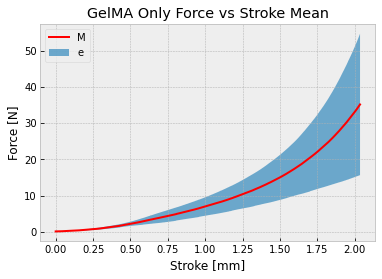

In [58]:
#plt.plot(GelMA_stroke_mean, GelMA_force_mean,color = 'k')
plt.plot(Strk1['Mean'], F1['Mean'], color= 'r')
#plt.plot(GelMA_stroke_mean, F, color= 'r')
plt.fill_between(Strk1['Mean'], F1['Error1'], F1['Error2'], alpha = 0.7)
plt.grid(visible=True)
plt.legend('Me', loc = 'upper left')
plt.title('GelMA Only Force vs Stroke Mean')
plt.xlabel('Stroke [mm]')
plt.ylabel('Force [N]')
#plt.savefig("GelMA only_FS Mean.png")
plt.show()

### Stress_Strain Mean plotting 

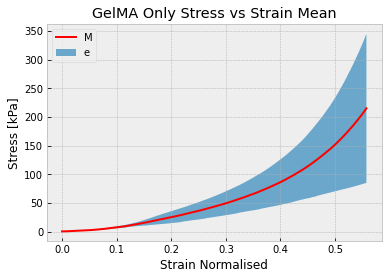

In [59]:
#plt.plot(GelMA_strain_mean, GelMA_stress_mean,color = 'k')
plt.plot(Strn1['Mean'], S1['Mean'], color= 'r')
plt.fill_between(Strn1['Mean'], S1['Error1'], S1['Error2'], alpha = 0.7)
plt.grid(visible=True)
plt.legend('Me', loc = 'upper left')
plt.title('GelMA Only Stress vs Strain Mean')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [kPa]')
#plt.savefig("GelMA only_SS Mean.png")
plt.show()

# Margin of Error

## Force_Stroke Margin Error

In [ ]:
def error_margin_fs (mean):
    a = 0.001/mean #1mm = 0.001m
    return (1 +- a)*mean

In [ ]:
GelMA_Only_Error_FS = error_margin_fs(Strk1['Mean'])

In [ ]:
df1_GelMA_Only_Er = {'GelMA Force Mean':GelMA_force_mean,
                  'GelMA Stroke Mean':GelMA_stroke_mean,
                    'GelMA Error Margin':GelMA_Only_Error_FS}


dfF_GelMA_Only_Er = {'GelMA Force Mean':F,
                  'GelMA Stroke Mean':GelMA_stroke_mean,
                    'GelMA Error Margin':GelMA_Only_Error_FS}

GelMA_Only_Er = pd.DataFrame(df1_GelMA_Only_Er) 

GelMA_Only_Er

GelMA_Only_Er.to_csv('GelMA_Only_Error_FS.csv')

In [ ]:
plt.plot(GelMA_stroke_mean, GelMA_force_mean,color = 'k')
#plt.errorbar(GelMA_stroke_mean, GelMA_force_mean, yerr = GelMA_Only_Error_FS, fmt = ' ')
plt.errorbar(Strk1['Mean'], F1['Mean'], yerr = GelMA_Only_Error_FS, fmt = ' ', color = 'r')

plt.grid()
plt.legend('Mean')
plt.title('GelMA Only Force vs Stroke Mean & Error Margin')
plt.xlabel('Stroke [mm]')
plt.ylabel('Force [N]')
plt.savefig("GelMA only_FS Mean_Error.png")
plt.show()


#plt.fill_between(strain, error1, error1, alpha = 0.2)

## Stress_Strain Margin Error

In [ ]:
#import numpy as np
#import scipy.stats


#def mean_confidence_interval(data, confidence=0.95):
#    a = 1.0 * np.array(data)
#    n = len(a)
#    m, se = np.mean(a), scipy.stats.sem(a)
#    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
#    return m, m-h, m+h

In [ ]:
#import scipy.stats as stats
#from scipy.stats import sem

#z_critical = stats.norm.ppf(q = 0.95)  
#sample_size=len(S)

# path        [File location variable]
#Code starts here
#data = pd.DataFrame(S)
#sample_std = np.std(data, ddof=1) / np.sqrt(np.size(data))
#data_sample = data.sample(n=2000, random_state=0)
#sample_mean = data_sample['installment'].mean
#sample_std = sem(S)
#a = sample_size ** 0.5
#margin_of_error = z_critical * (sample_std/44.721)
#confidence_interval = (S + margin_of_error, S - margin_of_error)

In [ ]:
#def z_error_mean (C, std, n):
#    er = (std / n**.5)*stats.norm.ppf(C+(1-C)/2,0,1)
#    return print("The margin of error is", er)

In [ ]:
#margin_of_error = z_error_mean(0.9, sample_std, sample_size)

In [ ]:
#Stress = mean_confidence_interval(S)
#Stress

In [ ]:
GelMA_D_Mean
GelMA_A_Mean

b= 0.001/GelMA_D_Mean

def error_margin_ss (force):
    from scipy import stats
    a = force/((1+2*b)*GelMA_A_Mean)
    c = force/((1-2*b)*GelMA_A_Mean)
    return (a,c)

In [ ]:
error_margin_ss(F)

In [ ]:
plt.errorbar(GelMA_strain_mean, S, yerr = error_margin_ss(F), fmt = ' ', color = '#A2A2A2', alpha = 0.5)
plt.plot(GelMA_strain_mean, S,color = 'r')

plt.grid()
plt.legend('Mean')
plt.title('GelMA Only Stress vs Strain Mean & Error Margin')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [Pa]')
#plt.savefig("GelMA only_SS Mean_Error.png")
plt.show()